Dataset Details This dataset has funding information of the Indian startups from January 2015 to August 2017. Feature Details : SNo - Serial number. Date - Date of funding in format DD/MM/YYYY. StartupName - Name of the startup which got funded. IndustryVertical - Industry to which the startup belongs. SubVertical - Sub-category of the industry type. CityLocation - City which the startup is based out of. InvestorsName - Name of the investors involved in the funding round. InvestmentType - Either Private Equity or Seed Funding. AmountInUSD - Funding Amount in USD.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv(r"startup_funding.csv")
df = file.copy()

df.head()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# Number of Fundings
Problem Statement :

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :

There is some error in the 'Date' feature. Make sure to handle that.

In [7]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          930
CityLocation         179
InvestorsName          0
InvestmentType         1
AmountInUSD          844
Remarks             1946
dtype: int64

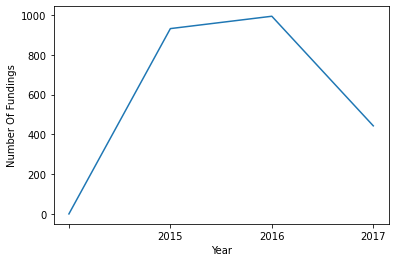

  1
2015  931
2016  993
2017  443


In [10]:
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = pd.read_csv(r"startup_funding.csv")
df = file.copy()

year = df['Date'].str.split('/',expand = True)[2]
year_fund = year.value_counts()

x = []
y = []

for i in sorted(year_fund.index):
    x.append(i)
    y.append(year_fund[i])

plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Number Of Fundings')
plt.show()

for j in range(len(x)):
    print(x[j],'',y[j])

# Top Indian Cities
Problem Statement :

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

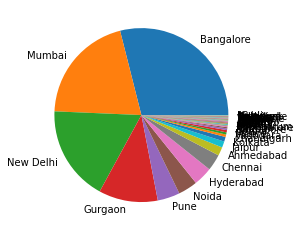

Bangalore   635
Mumbai   447
New Delhi   389
Gurgaon   241
Pune   91
Noida   79
Hyderabad   77
Chennai   67
Ahmedabad   35
Jaipur   25


In [3]:
df[df['CityLocation'] == 'Delhi'] = 'New Delhi'
df[df['CityLocation'] == 'bangalore'] = 'Bangalore'


city = df['CityLocation'].str.split('/',expand = True)[0]
city = city.str.strip(' ')
city_startup = city.value_counts()

x = city_startup.values
label = city_startup.index

plt.pie(x , labels = label)
plt.show()

for i in range(10):
    print(label[i],' ',x[i])

# Top Industries
Problem Statement :

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :

Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


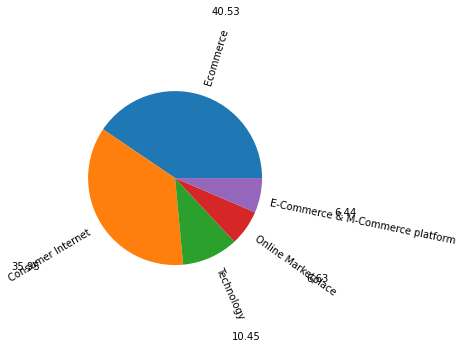

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv(r"startup_funding.csv")
df = file.copy()

df['IndustryVertical'].replace('eCommerce','Ecommerce', inplace = True)
df['IndustryVertical'].replace('ECommerce','Ecommerce', inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce', inplace = True)
df['IndustryVertical'].dropna(inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').fillna(0).astype(int)

invest_indus = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]

perc = np.true_divide(invest_indus.values, invest_indus.values.sum())*100

for i in range(len(invest_indus)):
    print(invest_indus.index[i],format(perc[i],'.2f'))
    
plt.pie(invest_indus,labels = invest_indus.index,autopct= "%.2f",rotatelabels=True,pctdistance=2)
plt.show()

#df['IndustryVertical'].unique()

# Top startups
Problem Statement :

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv(r"startup_funding.csv")
df = file.copy()

df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)

df['StartupName'].dropna(inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').fillna(0).astype(int)

invest_startup = df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]

for i in invest_startup.index:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Top Investor
Problem Statement :

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:

In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv(r"startup_funding.csv")
df = file.copy()

df.dropna(subset = ['InvestorsName'],inplace = True)

def sep_investor(name):
    return name.split(', ')[0]
df['InvestorsName'] = df['InvestorsName'].apply(sep_investor)
df.reset_index(drop = True,inplace = True)
count = 0

d = {}
for i in df['InvestorsName']:
    
    d[i] = d.get(i,0) + 1

for i in d:
    if d[i] == max(d.values()):
        print(i, d[i])

Sequoia Capital 39
